The Historical price data is available for car current price depreciation and number of years.

Sought after Insights:

1. Analyze the data and see if there is a correlation in the depreciation percentage and years.

2. Try and build a Regression model that would help the company to predict the price of the car based on its age.

3. Try and build a model that helps to predict the the negotiation  price as per the data, keeping other factors constant.


### Regression from Scratch

In [6]:
#importing pandas,numpy and seaborn libraries
import pandas as pd
import numpy as np
import seaborn as sb

In [16]:
#importing the data from saved excel file for price after x years and selling price
#Sheetname for reading the sheet precisely
df= pd.read_excel('https://raw.githubusercontent.com/Kash48/Car-Depreciating-model-Pricing-Analytics-Linear-/master/Price.xlsx ')
print(df.shape)
df.head()

(12, 2)


,Year,Sell_Percentage
0,1,0.78
1,2,0.65
2,3,0.58
3,4,0.49
4,5,0.40


In [17]:
#collecting x and y data from the data frame to an one dimension numpy array for calculation ease
X=df['Year'].values; 
Y=df['Sell_Percentage'].values

#Calculating the mean of x and y
mean_x=np.mean(X); mean_y=np.mean(Y)

print( "mean_x",mean_x)
print( "mean_y",mean_y)

mean_x 6.5
mean_y 0.3475


In [12]:
#Total number of values captured in  a array, basically the number of rows, this would help in loop iterations
n=len(X) 

#calculating the linear regression coefficients, the slope(b) and the y Intercept(a)
numer=0
denom=0
for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y) # Covariance of X and Y, this is the numerator
    denom+=(X[i]-mean_x)**2 # Variance of X, this is the denominator
b=numer/denom #equation of calculating slope
a=mean_y-(b*mean_x) #equation of y intercept
    
#print the coefficients of the best fit line, the model say at 0 year price=77.5%
#the rateof change per year is almost -6.5%
print(a,b)

0.775 -0.06576923076923077


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Y_pred -0.014230769230769269
sst 0.633225
sse 0.014665384615384618
R-square 0.9768401680044461


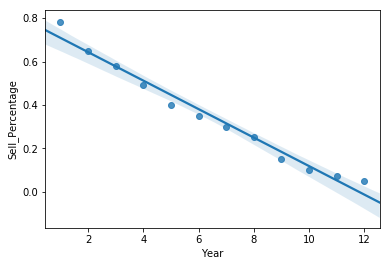

In [14]:
#plotting regression line and the actual observed point using the seaborn module
sb.regplot(x=df["Year"], y=df["Sell_Percentage"])

#Calculate the r square, for the goodness of fit, that helps in undersating how much the model explains the data points
#The R square comes out to be .9768, this means 97.68% of the variation is explained by the model :)
sse=0 # Sum of squared errors
sst=0 # Sumof squared Total
for i in range(n):
    y_pred=a+b*X[i]
    sst+=(Y[i]-mean_y)**2
    sse+=(Y[i]-y_pred)**2
    r2=1-(sse/sst)
print("Y_pred", y_pred)    
print("sst",sst)
print("sse",sse)
print("R-square",r2)

### Regression code with SLR Assumptions

In [18]:
#Importing various modules and reading excel file from the folder
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sb
import matplotlib.pyplot as plt

In [20]:
#importing the data from saved excel file for price after x years and selling price
#Sheetname for reading the sheet precisely
df= pd.read_excel('https://raw.githubusercontent.com/Kash48/Car-Depreciating-model-Pricing-Analytics-Linear-/master/Price.xlsx ')
print(df.shape)
df.head()

(12, 2)


,Year,Sell_Percentage
0,1,0.78
1,2,0.65
2,3,0.58
3,4,0.49
4,5,0.40


In [25]:
#iloc for reading salary(dependent) and yearexperience(independent) into arrays
# Reading data into X and Y variables, if you notice X with iloc, you do not have to reshape the array lol :)
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values

'''
**********************************
Assumption 1 of Simple Linear Regression
1. The 2 variables X and Y need to be continous numeric, NOT categorical.
**********************************
'''
# By Inspecting the 2 variables X and Y, both are continous and Numeric
# Assumption 1 PASS

'''
**********************************
Assumption 2 of Simple Linear Regression
2. Data is free of Missing values, if missing values are there MVT need to be performed.

**********************************
'''
def mmissing_counter(Y):
    if np.count_nonzero(~np.isnan(Y))==len(Y):
        return print("No missing values")
    else:
        return print("Missing value count is",len(Y)-np.count_nonzero(~np.isnan(Y)), "out of" ,len(Y))


mmissing_counter(X)
mmissing_counter(Y)

# Assumption 2 PASS

No missing values
No missing values


In [27]:
'''
**********************************
Assumption 3 of Simple Linear Regression
3. Data is free of outliers, 
If the  outliers are there take a business decision for removal @95% z=1.96 or @99.97% z=2.97

**********************************
'''
z = max(np.abs(stats.zscore(Y)))
print("z-score",z)

# Assumption 3 PASS

z-score 1.8827719024663627


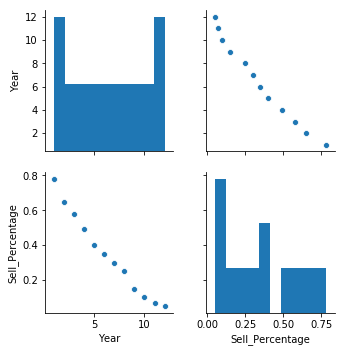

In [29]:
'''
**********************************
Assumption 4 of Simple Linear Regression
4. Linear relationship between X and Y
**********************************
'''
x=df['Year'].values
y=df['Sell_Percentage'].values
np.corrcoef(x,y)
df.cov()
sb.pairplot(df)

# Assumption 4 PASS as the relationship seems to be strongly inverse linear and corr and cov are negative

In [32]:
'''
**********************************
Assumption/suggestion 5 of Simple Linear Regression
5. Depending on the case/business need, data should be split into TRAIN and TEST
**********************************
'''
# Assumption 5 PASS and we are splitting data, as per the problem

'''
***************************************************************************************
***************************************************************************************
***************************************************************************************
Carrying on with Simple Linear REgression
***************************************************************************************
***************************************************************************************
***************************************************************************************
'''

#splitting data into training and test sets
#Note that it would need 4 parameters in the same test and train sequence
#train_test_split is a function in the cross_validation module, read help for more details :)
#X and Y are the arrays that we created above using iloc, always check the dimension
#test_size=1/3 so train_size=2/3, you can give either, usually 80:20 is the norm
#random_state=0 is the seed value for replicating the results, we hardcode it for replicating the results
#The train and test would now have random values of removing any data bias and let go of data inbuilt patterns
#The name could be any for the name of the sets a,b,c,d would work, just the sequance maters
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

#we import the LinearRegression class
#reg is simply a linear regressor object and LinearRegression is a class, reg is an instance of class 
#fit is a method available in LinearRegression class, this now creates a best line fit based on X and Y
#At this point the machine learning model is ready and the best fit line is in place
#this reg object cannow be called with predict method for predicting value of an array or single value
#You cannot call the predict method if the object reg is not trained using the fit method
#Y_predict are the predicted salaries and Y_test are actuals, you can compare them to see the model's performance
#creating y_predict to match with Y_test, y_predict is created with X_test 
#In summary we are trying to predict y with test x and match against test y for the accuracy of the model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
Y_predict=reg.predict(X_test)
Y_predict

array([ 0.30123631, -0.06034429,  0.44586854,  0.01197183])

The current price after depreciation is [4097.10485133]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


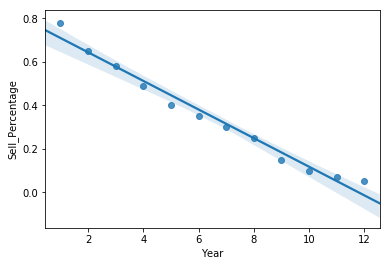

In [34]:
#We are now trying to forecast, lets say what would be price after 5.5 years
#predict is a method in LinearRegression class that helps in prediction based on trained model
#Let's say I have a car of $10,000, after 5.5 year it would be sold for $4097
ar=np.array(5.5)
print(f"The current price after depreciation is {reg.predict(ar.reshape(1,1))*10000}")

#plotting regression line and the actual observed point using the seaborn module
sb.regplot(x=df["Year"], y=df["Sell_Percentage"])

In [35]:
#Calculating the R square and printing it for the goodness of fit, it come out to be 98.48%
#The variation that can be explained by this model is 98.96%
r2_score=reg.score(X_train,Y_train)
print("R-square",r2_score) 


#Let's calculate the RMSE from scartch, RMSE is also a measure of the goodness of fit of a model.
#The RMSE is 6.6%
rss=((Y_test-Y_predict)**2).sum() #residual sum of squares 
mse=np.mean((Y_test-Y_predict)**2) #mean square error
print(f"Final rmse value is :{np.sqrt(mse)}")


R-square 0.9896431000755291
Final rmse value is :0.06642398309428525
